# Random Neural Network
Multi Layer Perceptron

A Multi-layer Perceptron (MLP) is a Neural Network a function by training on a dataset. Given a set of features
and a target, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. Here there is one hidden layer MLP with scalar output.

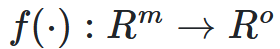

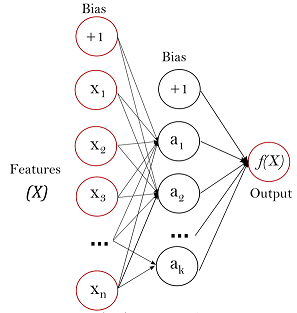

What happens if we feed a multi layer perceptron with a random dataset? What is the final accuracy on validation set and test set? 

# All Imports

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pdb

We have 2 most important ways to creato models in Keras:

1) The **Sequential** model, which is very straightforward that is a linear list of layers, but it is limited to single-input, single-output stacks of layers.

2) The **Functional** API, which is an easy-to-use, fully-featured API that supports arbitrary model architectures. For most people and most use cases, this is what you should be using. 

In [21]:
from tensorflow.keras.models import Sequential

**Dense** implements a fully connected layer belonging to a Multi Layer Perceptron. Namely Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True). These are all attributes of Dense.

In [22]:
from tensorflow.keras.layers import Dense

**to_categorical** converts a class vector (integers) which is the vector of labels, to a binary class matrix. Namely to_categorical implements the **one-hot-encoding**.


In [23]:
from tensorflow.keras.utils import to_categorical

Let's disable some aggressive warnings, specifically the deprecation warnings

In [24]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)

# Initializations

Set the dimensionality of data such as mnist 28 x 28 images

In [25]:
input_dim = 784

# Model Definition

Initialize Keras model as Sequential since this is a simple model (in keras there are 2 types of model: Sequential and Functional for more complicated models    

In [26]:
model = Sequential()

With **model.add** we can stack the neural network's layers defining the activation function (RELU) and the input shape for the first layer only. 

In [27]:
model.add(Dense(32, activation='relu', input_dim=input_dim))

**Softmax** is actually a normalized exponential function that is a generalization of the logistic function to multiple dimensions. It is used in multinomial logistic regression and is often used as the last activation function of a neural network to normalize the output of a network to a probability distribution over predicted output classes. 

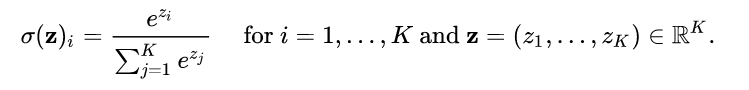

In simple words, it applies the standard exponential function to each element of the input vector and normalizes these values by dividing by the sum of all these exponentials; this normalization ensures that the sum of the components of the output vector is 1. 

In [28]:
model.add(Dense(10, activation='softmax'))                  

**Model.Compile** configures the model for training, by selecting the training algorithm or solver or optimizer. The loss function or cost function, which is the function to minimize in order to produce the better model parameters. And finally the metrics to evaluate the model on validation and training set. 

In [29]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',  metrics=['accuracy'])

**Model.summary** depicts a string summary of the neural network architecture or topology.

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


# Input Data Preprocessing

Generates dummy data


In [31]:
data = np.random.randint(255, size=(60000, input_dim))
labels = np.random.randint(10, size=(60000, 1))

Normalization for faster convergece of sgd

In [32]:
data = data / 255.0

Converts labels to categorical one-hot encoding. Namely this code translates to output labels into a matrix 60000 x 10 sized, with 5th column = 1 if the label is 5, the 8th col = 1 if label = 8, otherwise is 0.


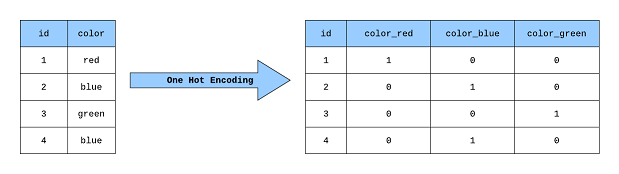

This is because: output from neural network is a vector of 10 probabilities whereas label vectors is made of scalars (single values), for example 5,4,2,8

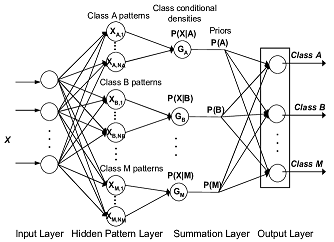

In order to calculate derivatives we have to translate labels vector in one-hot encoding: 8 becomes [0,0,0,0,0,0,0,1,0,0], this is what to_categorical does.

In [33]:
labels = to_categorical(labels, num_classes=10)

Train the model, iterating on the data for 10 epochs, in batches of 32 samples


In [34]:
model.fit(data, labels, validation_split = 0.2, epochs=10, batch_size=32)       

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 2.3099 - accuracy: 0.1009 - val_loss: 2.3029 - val_accuracy: 0.1007
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3027 - accuracy: 0.1006 - val_loss: 2.3029 - val_accuracy: 0.1031
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3023 - accuracy: 0.1025 - val_loss: 2.3030 - val_accuracy: 0.1003
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3022 - accuracy: 0.1034 - val_loss: 2.3029 - val_accuracy: 0.1012
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3019 - accuracy: 0.1034 - val_loss: 2.3028 - val_accuracy: 0.1049
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3016 - accuracy: 0.1031 - val_loss: 2.3035 - val_accuracy: 0.1024
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3014 - accuracy: 0.1039 - val_loss: 2.3032 - val_accuracy:

Home Work: Run this program on Mnist and check accuracy. Why accuracy now is different? Why accuracy for random data is around 10% ? 

*Hint : * reshape the mnist input in order to feed the MLP

*Hint for the bests : * Adopt a Reshape layer instead of reshaping 